In [8]:
%matplotlib inline
import tables
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [13]:
class DataPreparation:
    def get_cat_label(self, sub_dir):
        if sub_dir == "Audio & Video Accessories":
            label = 1
        elif sub_dir == "Bags & Cases":
            label = 2
        elif sub_dir == "Batteries":
            label = 3
        elif sub_dir == "Batteries, Chargers & Accessories":
            label = 4
        elif sub_dir == "Cables & Accessories":
            label = 5
        elif sub_dir == "Cables & Interconnects":
            label = 6
        elif sub_dir == "Cases & Sleeves":
            label = 7
        elif sub_dir == "Computer Components":
            label = 8
        elif sub_dir == "Computers & Accessories":
            label = 9
        elif sub_dir == "Data Storage":
            label = 10
        elif sub_dir == "Digital Cameras":
            label = 11
        elif sub_dir == "Electronics":
            label = 12
        elif sub_dir == "Laptop & Netbook Computer Accessories":
            label = 13
        elif sub_dir == "MP3 Player Accessories":
            label = 14
        elif sub_dir == "Touch Screen Tablet Accessories":
            label = 15
        return label
    
    def write_hdf5_file(self, input_dir, output_dir, output_file_name):
        input_dir = os.path.abspath(input_dir)
        output_dir = os.path.abspath(output_dir)
        if not(os.path.exists(output_dir)):
            os.mkdir(output_dir)

        # Create hdf5 file            
        hdf5_file = tables.open_file(output_dir +  '/' + output_file_name, mode='w')

        # Create image array in hdf5 file
        img_store = hdf5_file.create_earray(hdf5_file.root, 'images', tables.UInt8Atom(), shape=(0,150,150,3))

        labels = [] # local in-memory labels array
        catnum = 0
        for sub_dir in next(os.walk(input_dir))[1]:
            label = self.get_cat_label(sub_dir)
            catnum = catnum + 1
            print("Writing images of the folder %s: %d/15" % (sub_dir, catnum))
            count = 1
            total = len(os.listdir(os.path.join(input_dir, sub_dir)))
            for file_ in os.listdir(os.path.join(input_dir, sub_dir)):
                if file_.endswith(".gif"):
                    print("Skipping gif file")
                    count = count + 1
                    continue
                print("Image %d/%d" % (count, total))
                img_path = os.path.join(input_dir, sub_dir, file_)
                img = cv2.imread(img_path)
                #print(img_path)
                #print(img.shape)
                img = cv2.resize(img,(150,150))
                img_store.append(img[None])
                labels.append(label)
                count = count + 1
        # Create labels array in hdf5_file for training labels
        label_store = hdf5_file.create_array(hdf5_file.root, 'labels', labels)
        # Close hdf5 file
        hdf5_file.close()

    def read_hdf5_file(self, filepath):
        print("Doing nothing")
        # To read data
        hdf5_file = tables.open_file(filepath, "r")
        # To access images array:
        images = hdf5_file.root.images
        # keep in mind the images variable is pointing to images on hard disk. So access will be slower.
        # If your memory is big enough to store all images, you can put this image array into memory by doing:
        # images = np.array(file.root.images)
        # To access labels:
        labels = hdf5_file.root.labels
        print(images.shape)
        print(labels.shape)
        # show a sample image
        plt.imshow(images[730])
        plt.show()
        hdf5_file.close()
        

Doing nothing
(731, 150, 150, 3)
(731,)


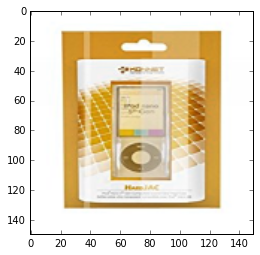

In [14]:
if __name__ == "__main__":
    #dp = DataPreparation()
    #dp.write_hdf5_file("/home/ibrar/Desktop/Deep_Learning_for_CV/project/product-classification/datasets",
    #                   "/home/ibrar/Desktop/Deep_Learning_for_CV/project/product-classification/datasets",
    #                   "training_set")
    dp = DataPreparation()
    dp.read_hdf5_file("/home/ibrar/Desktop/Deep_Learning_for_CV/project/product-classification/datasets/training_set")